<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_18_Apli_Sep_Schrodinger_Oxigeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-dd05c6b608a4>:64: RuntimeWarning: divide by zero encountered in divide
  V = -Z * e**2 / (4 * pi * epsilon_0 * r)


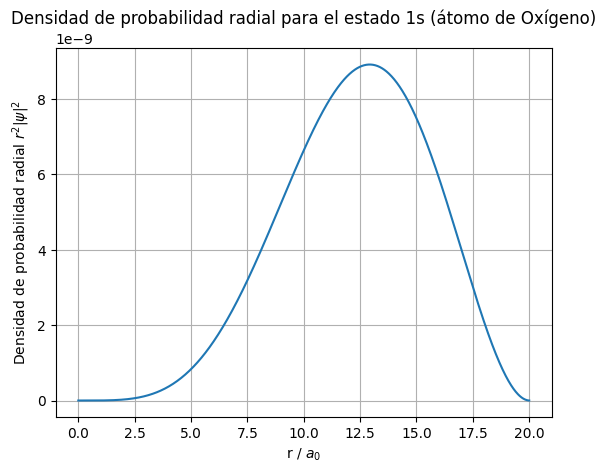

Energía del estado fundamental 1s: 54775904719850276210056263541173780480.00 eV


In [1]:

#Ejecución bajo  Consola Linux
#python3  Aula_18_Apli_Sep_Schrodinger_Oxigeno.py

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, m_e, epsilon_0, pi

# Constantes
Z = 8  # Número atómico para oxígeno
a0 = 4 * pi * epsilon_0 * hbar**2 / (m_e * e**2)  # Radio de Bohr

"""
El radio de Bohr es importante porque establece una escala
de longitud natural en la física atómica.
Es la distancia característica en la que los efectos cuánticos
son significativos para los electrones en los átomos.
En el caso del átomo de hidrógeno, que tiene solo un protón en el núcleo y un electrón,
el radio de Bohr define el tamaño promedio del átomo en su estado más bajo de energía.

Además, el radio de Bohr se utiliza en la definición de la estructura
fina y en cálculos relacionados con la espectroscopia atómica,
entre otros aspectos de la física cuántica.

El Radio de Bohr Escalado para el Átomo de Oxígeno
Para un átomo de un elemento con número atómico 𝑍,
el radio efectivo se escala de la siguiente manera:

Se establece que el radio de Bohr, para un electrón en el átomo de Hidrógeno,
viene dado por:
a0 = 4 * pi * epsilon_0 * hbar**2 / (m_e * e**2)
Cuando se habla de otros átomos, como el oxígeno, que tiene más protones en su núcleo
(Z=8 para el oxígeno), la atracción electrostática entre el núcleo y los electrones es mayor.
Como resultado, los electrones en el átomo de oxígeno están más cerca del
núcleo en comparación con los electrones en el átomo de hidrógeno.

El radio de Bohr ajustado para un átomo con número atómico 8
sería: a_oxígeno= a0/8
"""

# Parámetros de la simulación
N = 1000  # Número de puntos en la malla radial
r_max = 20 * a0  # Máximo valor de r
r = np.linspace(0, r_max, N)  # Malla radial
"""
En la física atómica, la malla radial permite calcular funciones de onda,
densidades de probabilidad, y otras propiedades cuánticas en función
de la distancia radial del núcleo, especialmente para átomos que pueden
ser tratados con simetría esférica.
La malla radial se utiliza para convertir una ecuación diferencial
continua (como la ecuación de Schrödinger)
en un sistema de ecuaciones algebraicas discretas que pueden resolverse numéricamente.
En la mecánica cuántica, cuando se trabaja con la ecuación de Schrödinger para sistemas con simetría esférica,
la función de onda depende solo de la distancia radial
r, y no de las direcciones angulares, lo que simplifica el problema.
En nuestro caso hemos establecido 1000 puntos.
N = 1000  # Número de puntos en la malla radial
También establecemos el radio máximo de probabilidad,
en proporción de 20 veces el radio de Bohr, para el hidrógeno.
Al mismo tiempo establecemos r, dentro de la gráfica prevista.
"""


# Potencial coulombiano V(r)
V = -Z * e**2 / (4 * pi * epsilon_0 * r)
V[0] = V[1]  # Evitar singularidad en r=0
"""
El potencial coulombiano V(r) describe la interacción electrostática
entre dos cargas eléctricas. En el contexto de la física atómica,
es el potencial que un electrón experimenta debido a la carga positiva del núcleo atómico.
Para un electrón en un átomo, el potencial coulombiano debido al núcleo
(considerado como una carga puntual) es dado por:
Es decir, V, el potencial, vendría dado, por la multiplicación del número atómico
por la carga del electrón al cuadrado, dividido por la multiplicación
de 4 por PI por la permisividad eléctrica en el vacío, por r, que sería
la distancia del núcleo a la posición del electrón.

Como de ve El potencial es negativo, lo que indica que la interacción entre el núcleo (positivo)
y el electrón (negativo) es atractiva.
A medida que r disminuye (el electrón se acerca al núcleo), la magnitud de
V(r) aumenta (más negativo), indicando que la energía potencial es más baja (más ligada)
cuanto más cerca está el electrón del núcleo.
El potencial es directamente proporcional a 𝑍
Z. Para átomos con un mayor número atómico, la atracción entre el núcleo y los electrones es más fuerte.
En la ecuación de Schrödinger para un átomo con simetría esférica (como el hidrógeno o los átomos hidrogenoides), el potencial coulombiano
V(r) se usa para describir cómo varía la energía potencial del electrón en función de su distancia del núcleo.

Por ejemplo, en el código Python que te mostré antes, el potencial coulombiano para el átomo de oxígeno
lo calculamos en nuestro programa de la siguiente manera:
V = -Z * e**2 / (4 * pi * epsilon_0 * r)
"""

# Diferencias finitas
h = r[1] - r[0]
diag = 2 / h**2 + V
off_diag = -1 / h**2 * np.ones(N-1)
"""
El método de diferencias finitas es una técnica numérica utilizada
para aproximar soluciones a ecuaciones diferenciales.
En lugar de resolver la ecuación de forma analítica
(lo cual es a menudo imposible para problemas complejos),
se discretiza el dominio del problema (por ejemplo, el espacio o el tiempo)
en una serie de puntos, y se utilizan aproximaciones de las derivadas en esos puntos.
La idea principal de las diferencias finitas es aproximar
las derivadas de funciones mediante combinaciones lineales
de los valores de la función en puntos cercanos.
Con el trámo anterior de código intentamos establecer
parte del proceso de construcción de una matriz Hamiltoniana
utilizando el método de diferencias finitas para
resolver la ecuación de Schrödinger de un átomo con simetría esférica.
La matriz Hamiltoniana es una representación matricial
del operador Hamiltoniano en un sistema cuántico,
que describe la energía total del sistema (energía cinética + energía potencial).
En el contexto de la ecuación de Schrödinger y el método de diferencias finitas,
la matriz Hamiltoniana se utiliza para discretizar la ecuación y resolverla numéricamente.
La matriz Hamiltoniana es crucial en la mecánica cuántica porque encapsula
toda la información energética del sistema cuántico.
Al construir esta matriz usando diferencias finitas,
podemos resolver problemas complejos como la determinación
de los niveles de energía en átomos multielectrónicos mediante métodos numéricos.
Para entenderlo, básicamente
La matriz Hamiltoniana en la mecánica cuántica nos ayuda a determinar
los niveles de energía de un sistema cuántico y,
mediante la función de onda asociada a cada nivel de energía,
podemos establecer distribuciones de probabilidad para encontrar partículas,
como electrones, en ciertas regiones del espacio.
"""


# Construcción de la matriz hamiltoniana
H = np.diag(diag) + np.diag(off_diag, -1) + np.diag(off_diag, 1)

# Solución de la ecuación de Schrödinger (autovalores y autovectores)
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Energía del estado fundamental (orbital 1s)
E1s = eigenvalues[0]

# Función de onda radial correspondiente al estado fundamental
psi1s = eigenvectors[:, 0]

# Normalización de la función de onda
psi1s /= np.sqrt(np.sum(psi1s**2) * h)

# Probabilidad radial
probabilidad_radial = 4 * pi * r**2 * np.abs(psi1s)**2

# Graficar la densidad de probabilidad radial
plt.plot(r / a0, probabilidad_radial)
plt.xlabel(r"r / $a_0$")
plt.ylabel(r"Densidad de probabilidad radial $r^2|\psi|^2$")
plt.title("Densidad de probabilidad radial para el estado 1s (átomo de Oxígeno)")
plt.grid()
plt.show()

print(f"Energía del estado fundamental 1s: {E1s/e:.2f} eV")
